In [5]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [6]:
y = data['cnt']
X = data.drop('cnt', axis=1)

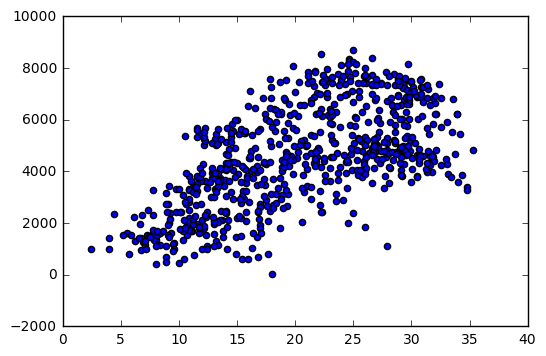

In [8]:
scatter(X['temp'], y);

In [11]:
X.columns.shape[0]

12

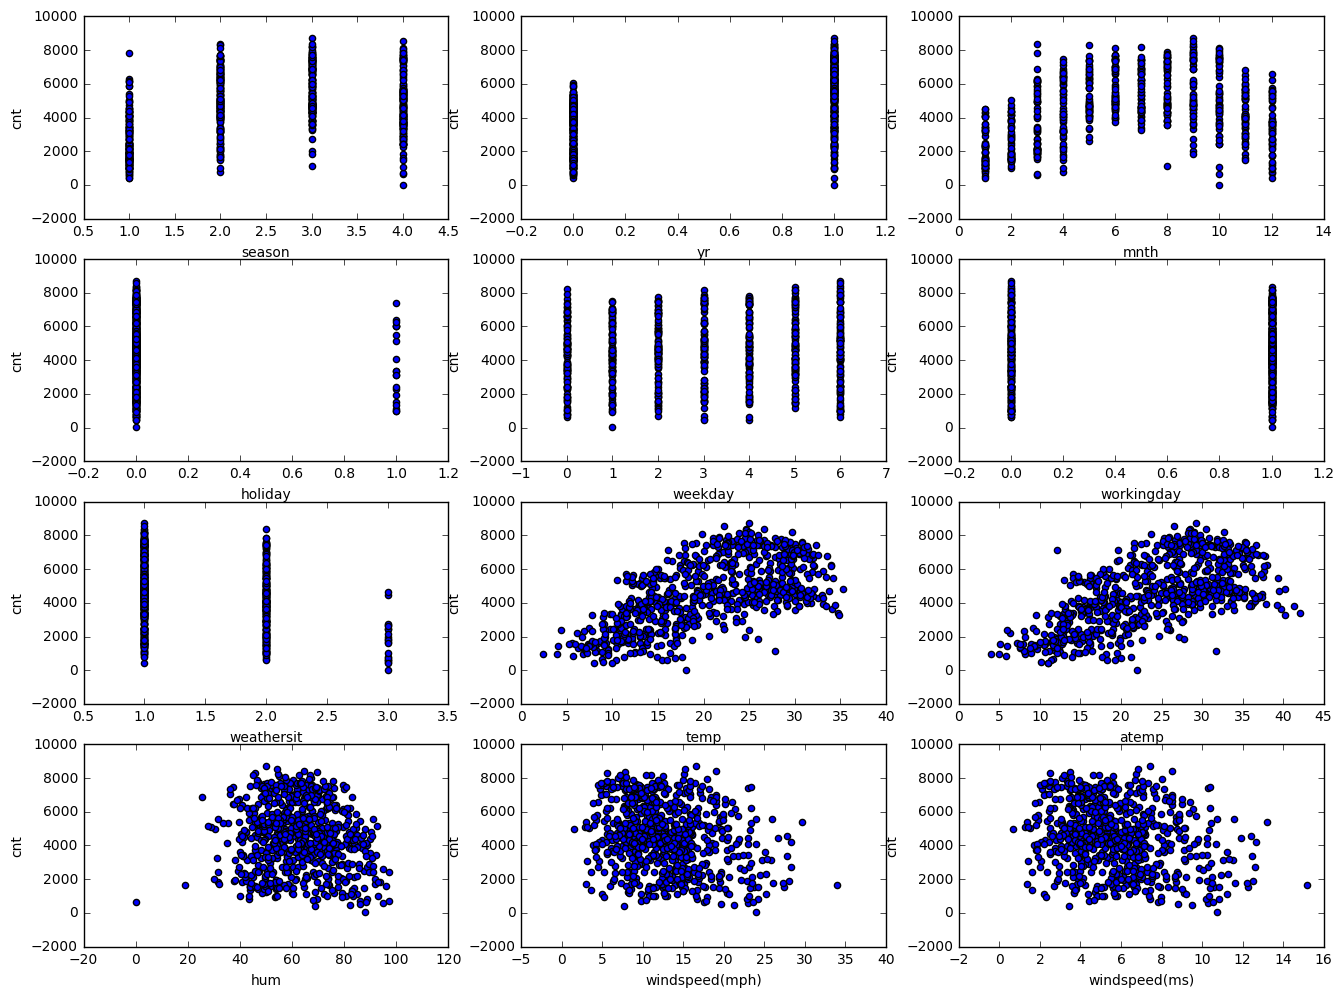

In [19]:

fig, axes = subplots(nrows=4, ncols=3)

for feat_id, feature in enumerate(X.columns):
    data.plot(feature, 'cnt', ax=axes[feat_id // 3, feat_id % 3], 
             kind='scatter', figsize=(16,12))

In [20]:
X.corrwith(y)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(X)

In [25]:
pd.DataFrame(X_scaled, columns=X.columns).corrwith(y)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [27]:
lin_model = LinearRegression()

In [28]:
lin_model.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lin_model.coef_

array([  5.70869093e+02,   1.02197481e+03,  -1.41302903e+02,
        -8.67526806e+01,   1.37221946e+02,   5.63935817e+01,
        -3.30227526e+02,   3.67475059e+02,   5.85554735e+02,
        -1.45609390e+02,   1.24577917e+13,  -1.24577917e+13])

In [31]:
pd.DataFrame(lin_model.coef_, index=X.columns,
            columns=['coeff']).sort_values(by='coeff', ascending=False)

,coeff
windspeed(mph),1.245779e+13
yr,1.021975e+03
atemp,5.855547e+02
season,5.708691e+02
temp,3.674751e+02
weekday,1.372219e+02
workingday,5.639358e+01
holiday,-8.675268e+01
mnth,-1.413029e+02
hum,-1.456094e+02


In [32]:
X.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)',
       'windspeed(ms)'],
      dtype='object')

In [35]:
lin_model.fit(X_scaled[:,:-1], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
pd.DataFrame(lin_model.coef_, index=X.columns[:-1],
            columns=['coeff']).sort_values(by='coeff', ascending=False)

,coeff
yr,1020.350746
atemp,581.906559
season,565.874453
temp,371.140995
weekday,138.360293
workingday,55.955777
holiday,-86.692605
mnth,-134.461991
hum,-145.016239
windspeed(mph),-198.070544


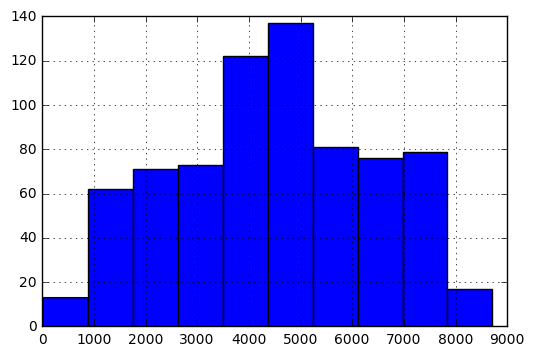

In [38]:
data['cnt'].hist()

In [39]:
from sklearn.model_selection import cross_val_score

In [45]:
sqrt(mean(abs(cross_val_score(LinearRegression(), X_scaled, y, cv=5,
                        scoring='neg_mean_squared_error'))))

1009.6296853297233

In [46]:
def cv_rmse(model):
    return sqrt(mean(abs(cross_val_score(model, X_scaled, y, cv=5,
                        scoring='neg_mean_squared_error'))))
    

In [47]:
cv_rmse(LinearRegression())

1009.6296853297233

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
cv_rmse(RandomForestRegressor(n_estimators=100))

934.34417211569087

In [68]:
lasso = Lasso(alpha=10)

In [69]:
lasso.fit(X_scaled, y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
pd.DataFrame(lasso.coef_, index=X.columns,
            columns=['coeff']).sort_values(by='coeff', ascending=False)

,coeff
yr,1.011538e+03
atemp,5.853092e+02
season,5.094408e+02
temp,3.661137e+02
weekday,1.286299e+02
workingday,4.863290e+01
windspeed(ms),-2.590085e-08
mnth,-7.708662e+01
holiday,-8.100681e+01
hum,-1.367102e+02


In [71]:
best_lasso = LassoCV()

In [73]:
best_lasso.fit(X_scaled, y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [74]:
best_lasso.alpha_

26.320108685136749

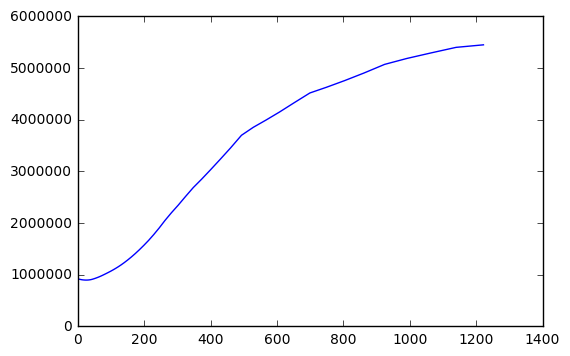

In [79]:
plot(best_lasso.alphas_,  best_lasso.mse_path_.mean(axis=1))

In [80]:
cv_rmse(best_lasso)

990.46731701026363

In [82]:
ridge = Ridge().fit(X_scaled, y)

In [83]:
ridge.coef_

array([  563.06457225,  1018.94837879,  -131.87332028,   -86.746098  ,
         138.00511118,    55.90311038,  -332.3497885 ,   386.45788919,
         566.34704706,  -145.0713273 ,   -99.25944108,   -99.25944115])

In [84]:
pd.DataFrame(ridge.coef_, index=X.columns,
            columns=['coeff']).sort_values(by='coeff', ascending=False)

,coeff
yr,1018.948379
atemp,566.347047
season,563.064572
temp,386.457889
weekday,138.005111
workingday,55.903110
holiday,-86.746098
windspeed(mph),-99.259441
windspeed(ms),-99.259441
mnth,-131.873320


In [85]:
best_ridge = RidgeCV()

In [86]:
best_ridge.fit(X_scaled, y)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [88]:
best_ridge.alpha_

10.0

In [89]:
cv_rmse(best_ridge)

998.75617937083564